# Roundabout

In [39]:
# import lib
import pandas as pd
import os
import matplotlib.pyplot as plt
import morton
import glob

In [40]:
m = morton.Morton(dimensions=2, bits=18)
def set_value(data,key1,key2):    
    return m.pack(round(data[key1]), round(data[key2]))

In [49]:
ReferenceRoundaboutAccelFileName='./SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/reference-roundabout/reference-roundabout.Vehicle-IMU-Acceleration-100Hz.csv'
RealDataIMUAccel10hzFileName='./SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/data/Vehicle-IMU-Acceleration-100Hz.csv'

In [42]:
def load_data_encode_with_morton(data,key1,key2,ts_key,offset1=0,offset2=0,multiplier1=1,multiplier2=1):   
    df=data.dropna()
    df[key1+'modified']=df[key1].add(offset1)
    df[key2+'modified']=df[key2].add(offset2)
    df[key1+'modified']=df[key1+'modified'].multiply(multiplier1)
    df[key2+'modified']=df[key2+'modified'].multiply(multiplier2)
    
    df['morton']=df.apply(set_value,args=(key1+'modified',key2+'modified'),axis=1)
    return df

In [43]:
def convert_timestamp(file_Name,keys):
    cols= ['sampleTimeStamp.seconds','sampleTimeStamp.microseconds']+keys
    df = pd.read_csv (file_Name, sep=';', usecols = cols)
    
    df['sample_ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
    df = df.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])
    fc= df.pop('sample_ts')
    df.insert(0,'sample_ts',fc)
    return df

In [44]:
df=convert_timestamp(ReferenceRoundaboutAccelFileName,['IMULatAcceleration','IMULgtAcceleration'])
print(df['IMULatAcceleration'].describe())
print(df['IMULgtAcceleration'].describe())

count    2092.000000
mean        0.448598
std         1.385922
min        -1.921000
25%        -0.722500
50%         0.178500
75%         1.700000
max         3.102500
Name: IMULatAcceleration, dtype: float64
count    2092.000000
mean       -0.010068
std         0.328284
min        -0.722500
25%        -0.229500
50%        -0.025500
75%         0.178500
max         1.530000
Name: IMULgtAcceleration, dtype: float64


In [62]:
def find_pattern_with_threshold_on_original_data(data,key,threshold1,threshold2,threshold3,data_offset1=0,data_offset2=0):  
    result= data.query("{0} > @threshold1 | ({0} < @threshold2 & {0}> @threshold3)".format(key))
    start_index=result.index[0]+data_offset1
    end_index=result.index[-1]+data_offset2
    print(result)
    # result=result[start_index:end_index].reset_index()

    plt.plot(result[key],result.index,label=str(key))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.gca().invert_yaxis()

1553


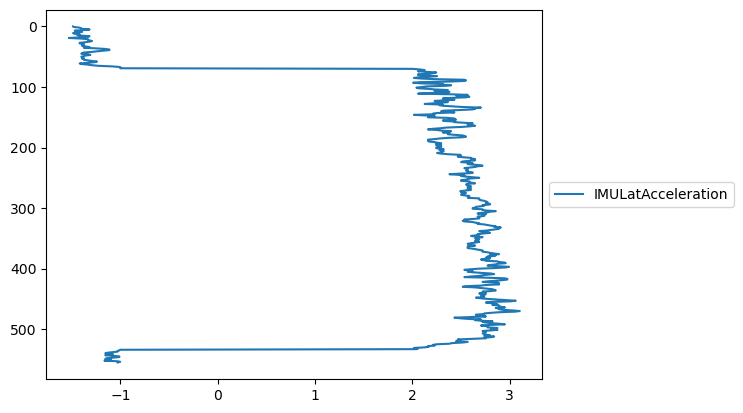

In [63]:
find_pattern_with_threshold_on_original_data(df,'IMULatAcceleration',2,-1,-2,0,0)

In [64]:
real_data=convert_timestamp(RealDataIMUAccel10hzFileName,['IMULatAcceleration','IMULgtAcceleration'])
print(real_data['IMULatAcceleration'].describe())
print(real_data['IMULgtAcceleration'].describe())

count    339388.000000
mean          0.223335
std           0.658783
min          -3.340500
25%          -0.093500
50%           0.153000
75%           0.365500
max           3.867500
Name: IMULatAcceleration, dtype: float64
count    339388.000000
mean          0.084765
std           0.690916
min          -4.037500
25%          -0.133875
50%           0.093500
75%           0.416500
max           2.686000
Name: IMULgtAcceleration, dtype: float64


336782


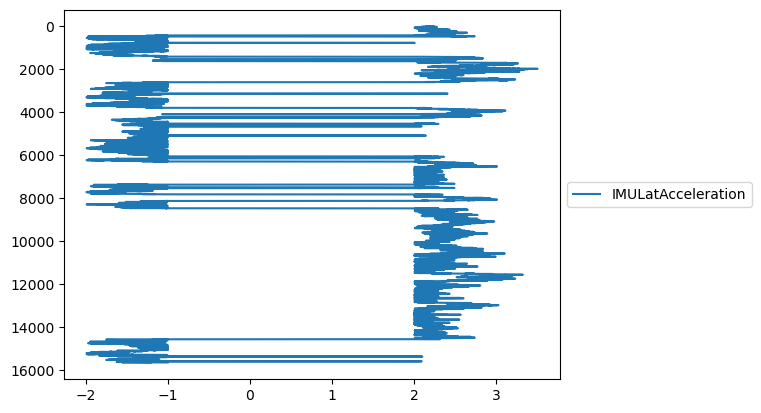

In [66]:
find_pattern_with_threshold_on_original_data(real_data,'IMULatAcceleration',2,-1,-2,0,0)

In [47]:
sfc_data= load_data_encode_with_morton(df,'IMULgtAcceleration','IMULatAcceleration')

TypeError: load_data_encode_with_morton() missing 1 required positional argument: 'ts_key'